In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Set visualization style
sns.set(style="whitegrid")


In [10]:
### LOAD PURCHASE BEHAVIOR DATASET ###
purchase_df = pd.read_csv("purchase_behaviour.csv")
purchase_df


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [12]:
# Display basic info
print("Purchase Behavior Dataset Info:")
print(purchase_df.info(), "\n")
print(purchase_df.head(), "\n")

Purchase Behavior Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None 

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream 



In [ ]:
### CUSTOMER SEGMENTATION ANALYSIS ###


In [18]:
# Count customers by life stage and premium status
lifestage_counts = purchase_df["LIFESTAGE"].value_counts()
premium_counts = purchase_df["PREMIUM_CUSTOMER"].value_counts()


In [21]:
lifestage_counts

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [23]:
premium_counts


PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

In [27]:
# Group by both LIFESTAGE and PREMIUM_CUSTOMER to get customer distribution
segment_distribution = purchase_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).size().reset_index(name="Count")
segment_distribution


,LIFESTAGE,PREMIUM_CUSTOMER,Count
0,MIDAGE SINGLES/COUPLES,Budget,1504
1,MIDAGE SINGLES/COUPLES,Mainstream,3340
2,MIDAGE SINGLES/COUPLES,Premium,2431
3,NEW FAMILIES,Budget,1112
4,NEW FAMILIES,Mainstream,849
5,NEW FAMILIES,Premium,588
6,OLDER FAMILIES,Budget,4675
7,OLDER FAMILIES,Mainstream,2831
8,OLDER FAMILIES,Premium,2274
9,OLDER SINGLES/COUPLES,Budget,4929


In [29]:
# Sort by most common segment
segment_distribution = segment_distribution.sort_values(by="Count", ascending=False)
segment_distribution


,LIFESTAGE,PREMIUM_CUSTOMER,Count
19,YOUNG SINGLES/COUPLES,Mainstream,8088
13,RETIREES,Mainstream,6479
10,OLDER SINGLES/COUPLES,Mainstream,4930
9,OLDER SINGLES/COUPLES,Budget,4929
11,OLDER SINGLES/COUPLES,Premium,4750
6,OLDER FAMILIES,Budget,4675
12,RETIREES,Budget,4454
15,YOUNG FAMILIES,Budget,4017
14,RETIREES,Premium,3872
18,YOUNG SINGLES/COUPLES,Budget,3779


In [31]:
# Display segment analysis
print("\nCustomer Segmentation Distribution:")
print(segment_distribution)


Customer Segmentation Distribution:
                 LIFESTAGE PREMIUM_CUSTOMER  Count
19   YOUNG SINGLES/COUPLES       Mainstream   8088
13                RETIREES       Mainstream   6479
10   OLDER SINGLES/COUPLES       Mainstream   4930
9    OLDER SINGLES/COUPLES           Budget   4929
11   OLDER SINGLES/COUPLES          Premium   4750
6           OLDER FAMILIES           Budget   4675
12                RETIREES           Budget   4454
15          YOUNG FAMILIES           Budget   4017
14                RETIREES          Premium   3872
18   YOUNG SINGLES/COUPLES           Budget   3779
1   MIDAGE SINGLES/COUPLES       Mainstream   3340
7           OLDER FAMILIES       Mainstream   2831
16          YOUNG FAMILIES       Mainstream   2728
20   YOUNG SINGLES/COUPLES          Premium   2574
17          YOUNG FAMILIES          Premium   2433
2   MIDAGE SINGLES/COUPLES          Premium   2431
8           OLDER FAMILIES          Premium   2274
0   MIDAGE SINGLES/COUPLES           Budget  

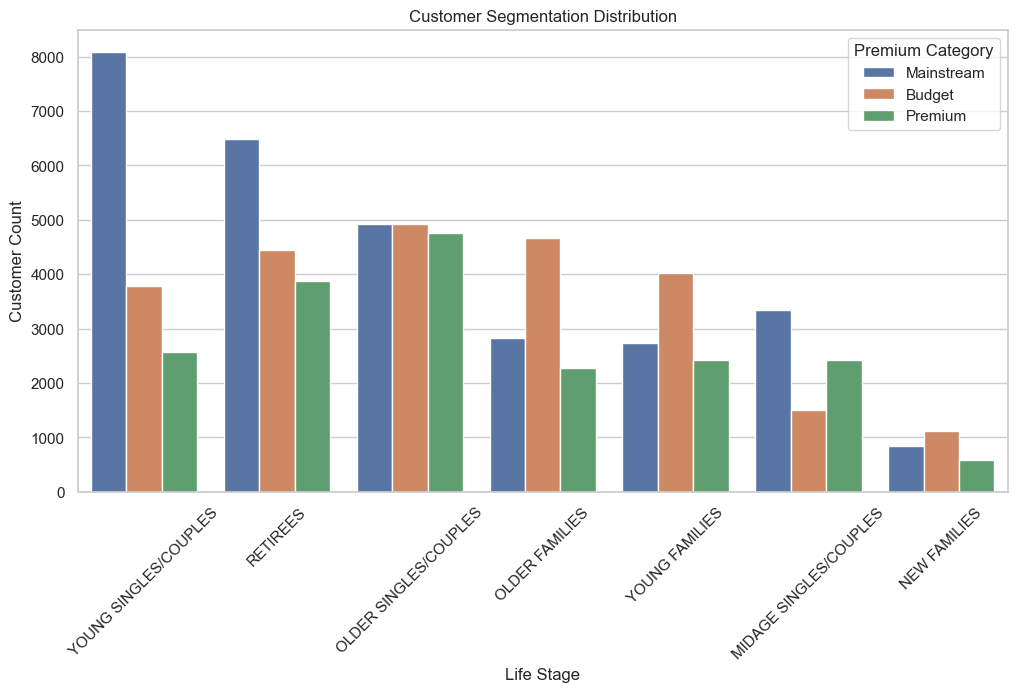

In [33]:
# Plot customer segmentation
plt.figure(figsize=(12,6))
sns.barplot(x="LIFESTAGE", y="Count", hue="PREMIUM_CUSTOMER", data=segment_distribution)
plt.xticks(rotation=45)
plt.title("Customer Segmentation Distribution")
plt.xlabel("Life Stage")
plt.ylabel("Customer Count")
plt.legend(title="Premium Category")
plt.show()